#Making Table 1 for the paper
Table 1 contains the radial velocity measurements shifted to the reference frame of the binary system velocity. Therefore I need a bit of code to make the table.

In [17]:
import numpy as np
import pandas as pd
import MassRatio_Fitter
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
# Read in the data and format the time column to 2 decimal places
t, rv1, rv1_err, rv2, rv2_err = np.loadtxt('data/rv_data.txt')
rv_df = pd.DataFrame(data=dict(t=t, rv1=rv1, rv1_err=rv1_err, rv2=rv2, rv2_err=rv2_err,
                               rv1_raw=rv1, rv1_err_raw=rv1_err, rv2_raw=rv2, rv2_err_raw=rv2_err))
rv_df = rv_df.convert_objects()

rv_df['JD'] = rv_df['t'].map(lambda t: '{:.2f}'.format(t))
rv_df.head()

,rv1,rv1_err,rv1_err_raw,rv1_raw,rv2,rv2_err,rv2_err_raw,rv2_raw,t,JD
0,1.92651,0.01275,0.01275,1.92651,NaN,NaN,NaN,NaN,2451809.659569,2451809.66
1,1.92852,0.01427,0.01427,1.92852,NaN,NaN,NaN,NaN,2451809.673975,2451809.67
2,1.84140,0.01186,0.01186,1.84140,NaN,NaN,NaN,NaN,2452142.680492,2452142.68
3,2.43256,0.01140,0.01140,2.43256,NaN,NaN,NaN,NaN,2453319.639237,2453319.64
4,2.55912,0.00992,0.00992,2.55912,NaN,NaN,NaN,NaN,2453585.853915,2453585.85


In [19]:
# Subtract the primary velocity from the secondary velocities to get it in an inertial frame
samples = np.load('data/SB2_samples.npy')
K1, K2, P, T0, w, e, dv1, dv2, lnf, noise = np.median(samples, axis=0)
rv1_pred = MassRatio_Fitter.get_rv(T0=T0, P=P, e=e, K1=K1, w=w, t=rv_df['t'].values)
rv_df['rv2'] += rv1_pred

In [20]:
# Apply the additive and multiplicative constants that we fit
rv_df['rv1'] -= dv1
rv_df['rv2'] -= dv2
rv_df['rv2_err'] *= np.exp(lnf/2.0)
rv_df.head()

,rv1,rv1_err,rv1_err_raw,rv1_raw,rv2,rv2_err,rv2_err_raw,rv2_raw,t,JD
0,-2.174239,0.01275,0.01275,1.92651,NaN,NaN,NaN,NaN,2451809.659569,2451809.66
1,-2.172229,0.01427,0.01427,1.92852,NaN,NaN,NaN,NaN,2451809.673975,2451809.67
2,-2.259349,0.01186,0.01186,1.84140,NaN,NaN,NaN,NaN,2452142.680492,2452142.68
3,-1.668189,0.01140,0.01140,2.43256,NaN,NaN,NaN,NaN,2453319.639237,2453319.64
4,-1.541629,0.00992,0.00992,2.55912,NaN,NaN,NaN,NaN,2453585.853915,2453585.85


<Container object of 3 artists>

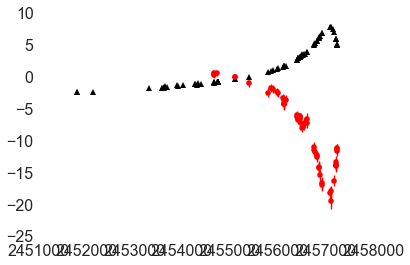

In [21]:
# Check to make sure it looks right
plt.errorbar(rv_df['t'], rv_df['rv1'], yerr=rv_df['rv1_err'], fmt='k^')
plt.errorbar(rv_df['t'], rv_df['rv2'], yerr=rv_df['rv2_err'], fmt='ro')

In [22]:
# Cut the measurements down to 3 sig figs
rv_df['rv1'] = rv_df['rv1'].map(lambda v: '{:.3f}'.format(float(v)))
rv_df['rv1_err'] = rv_df['rv1_err'].map(lambda v: '{:.3f}'.format(float(v)))
rv_df['rv2'] = rv_df['rv2'].map(lambda v: '{:.2f}'.format(float(v)) if pd.notnull(v) else v)
rv_df['rv2_err'] = rv_df['rv2_err'].map(lambda v: '{:.2f}'.format(float(v)) if pd.notnull(v) else v)

rv_df['rv1_raw'] = rv_df['rv1_raw'].map(lambda v: '{:.3f}'.format(float(v)))
rv_df['rv1_err_raw'] = rv_df['rv1_err_raw'].map(lambda v: '{:.3f}'.format(float(v)))
rv_df['rv2_raw'] = rv_df['rv2_raw'].map(lambda v: '{:.2f}'.format(float(v)) if pd.notnull(v) else v)
rv_df['rv2_err_raw'] = rv_df['rv2_err_raw'].map(lambda v: '{:.2f}'.format(float(v)) if pd.notnull(v) else v)

In [23]:
# Print out the table. Copy-paste into latex.
print rv_df[['JD', 'rv1_raw', 'rv1', 'rv1_err', 'rv2_raw', 'rv2', 'rv2_err']].to_latex(header=True, index=False, na_rep='\\nodata', escape=False)

\begin{tabular}{lllllll}
\toprule
         JD & rv1_raw &     rv1 & rv1_err &  rv2_raw &      rv2 &  rv2_err \\
\midrule
 2451809.66 &   1.927 &  -2.174 &   0.013 &  \nodata &  \nodata &  \nodata \\
 2451809.67 &   1.929 &  -2.172 &   0.014 &  \nodata &  \nodata &  \nodata \\
 2452142.68 &   1.841 &  -2.259 &   0.012 &  \nodata &  \nodata &  \nodata \\
 2453319.64 &   2.433 &  -1.668 &   0.011 &  \nodata &  \nodata &  \nodata \\
 2453585.85 &   2.559 &  -1.542 &   0.010 &  \nodata &  \nodata &  \nodata \\
 2453585.88 &   2.550 &  -1.551 &   0.011 &  \nodata &  \nodata &  \nodata \\
 2453634.64 &   2.654 &  -1.446 &   0.011 &  \nodata &  \nodata &  \nodata \\
 2453635.62 &   2.554 &  -1.547 &   0.009 &  \nodata &  \nodata &  \nodata \\
 2453655.64 &   2.711 &  -1.390 &   0.009 &  \nodata &  \nodata &  \nodata \\
 2453655.64 &   2.780 &  -1.321 &   0.027 &  \nodata &  \nodata &  \nodata \\
 2453689.54 &   2.665 &  -1.436 &   0.008 &  \nodata &  \nodata &  \nodata \\
 2453907.85 &   2.960